# Encoding Numerical Features
    1.Discretization(Binning)
    2.Binarization

## Discretization
![Screenshot 2024-03-28 090809.png](<attachment:Screenshot 2024-03-28 090809.png>)
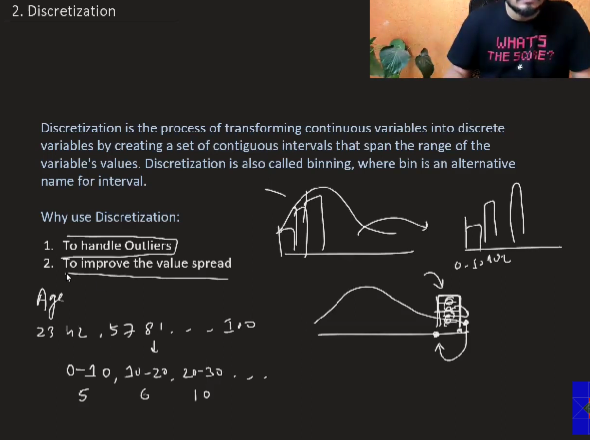

## Types of Discretization:-
![Screenshot 2024-03-28 090948.png](<attachment:Screenshot 2024-03-28 090948.png>)
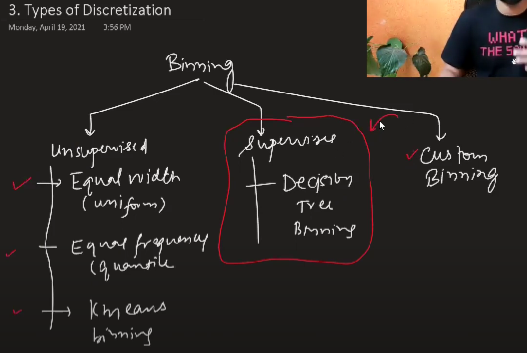

## Equal width/Uniform Binning:
![Screenshot 2024-03-28 091306.png](<attachment:Screenshot 2024-03-28 091306.png>)
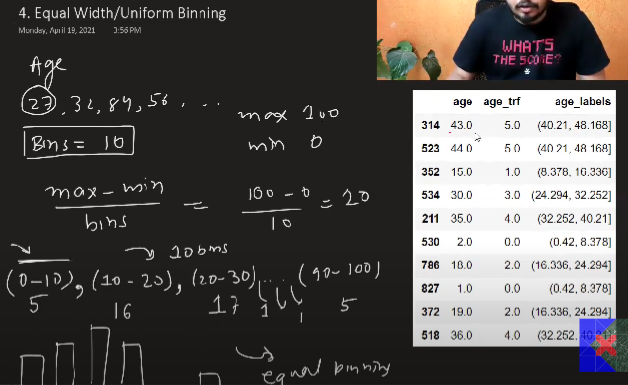

## Equal Frequancy/Quantile Binning:-
![Screenshot 2024-03-28 092041.png](<attachment:Screenshot 2024-03-28 092041.png>)
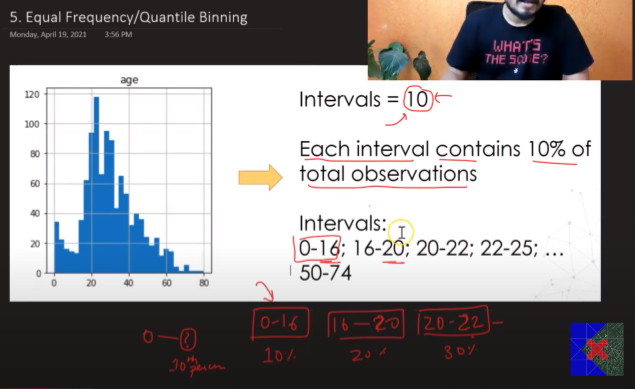

![Screenshot 2024-03-28 092726.png](<attachment:Screenshot 2024-03-28 092726.png>)
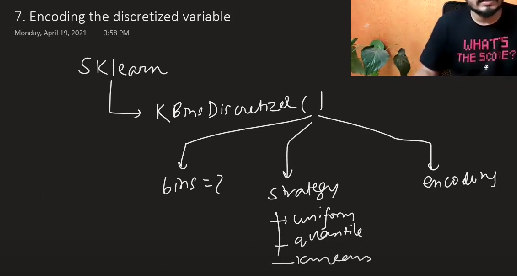

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [27]:
df=pd.read_csv('D:\\Machine_learning\\csv_files\\train.csv',usecols=['Age','Fare','Survived'])

In [28]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [29]:
df.shape

(891, 3)

In [30]:
df.dropna(inplace=True)

In [31]:
df.shape

(714, 3)

In [32]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [33]:
x=df.drop(columns='Survived')
y=df['Survived']

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
x_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [36]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)


y_pred=clf.predict(x_test)
accuracy_score(y_test,y_pred)


0.6363636363636364

In [37]:
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

0.6344874804381846

In [38]:
kbin_age=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [39]:
trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [40]:
x_train_trf=trf.fit_transform(x_train)
x_test_trf=trf.transform(x_test)

In [41]:
trf.named_transformers_['first'].n_bins_

array([15])

In [42]:
trf.named_transformers_['second'].n_bins_

array([15])

In [43]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.25  ,   7.775 ,   7.8958,   8.1583,  10.5   ,
               13.    ,  14.4542,  18.75  ,  26.    ,  26.55  ,  31.275 ,
               51.4792,  76.2917, 108.9   , 512.3292])                   ],
      dtype=object)

In [44]:
output=pd.DataFrame({
    'age':x_train['Age'],
    'age_trf':x_train_trf[:,0],
    'fare':x_train['Fare'],
    'fare_trf':x_train_trf[:,1]
})

In [45]:
output['age_labels']=pd.cut(x=x_train['Age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels']=pd.cut(x=x_train['Fare'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [46]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
16,2.0,0.0,29.1250,10.0,"(0.42, 6.0]","(26.55, 31.275]"
285,33.0,9.0,8.6625,4.0,"(32.0, 35.0]","(8.158, 10.5]"
189,36.0,10.0,7.8958,3.0,"(35.0, 38.0]","(7.775, 7.896]"
328,31.0,8.0,20.5250,8.0,"(30.0, 32.0]","(18.75, 26.0]"
148,36.5,10.0,26.0000,9.0,"(35.0, 38.0]","(18.75, 26.0]"


In [47]:
clf=DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)
y_pred2=clf.predict(x_test_trf)

In [48]:
accuracy_score(y_test,y_pred2)

0.6363636363636364

# Binarization
    -> In this section we convert the numerical value into binary number.
    e.g-> 1.Annual income (less than 6lacs=0,and greater than 6 lac=1)